# Laboratorio # 5

## Juan Camilo Chaparro Castellanos
#### cc 1039466438

### 1)  transformada z

utilizamos la siguiente ecuacion  

y[n] - 2.83* y[n-1] + 4*y[n−3] = 2* x[n] -3*x[n − 1]+x[n-2] 

Aplicamos la transformada Z a la funcion

Y(Z) (1-2.83*z^(-1)+4*z^(-3)) = X(Z)(2-3*z^(-1)+1*z^(-2))

 hallamos la funcion de transferencia del sistema
 H(Z)= Y(Z)/X(Z)

H[z]= (2-3*z^(-1)+1*z^(-2)) / (1-2.83*z^(-1)+4*z^(-3))

pasando a exponentes positivos, multiplicando H(z) * z^3/z^3

H[z] = 2*Z^(3)-3*z^(2)+1*z^(1)/ 1*z^(3)-2.83*z^(2)+4

#### 1.1) Importar funciones, grafica de frecuencia y fase, respuesta al impulso, respuesta al escalon y diagrama de polos y ceros

In [10]:
from ztrans import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import IPython

num=[2,-3,1,0]
den=[1, -2.83,0,4]

#### * respuesta en frecuencia y fase

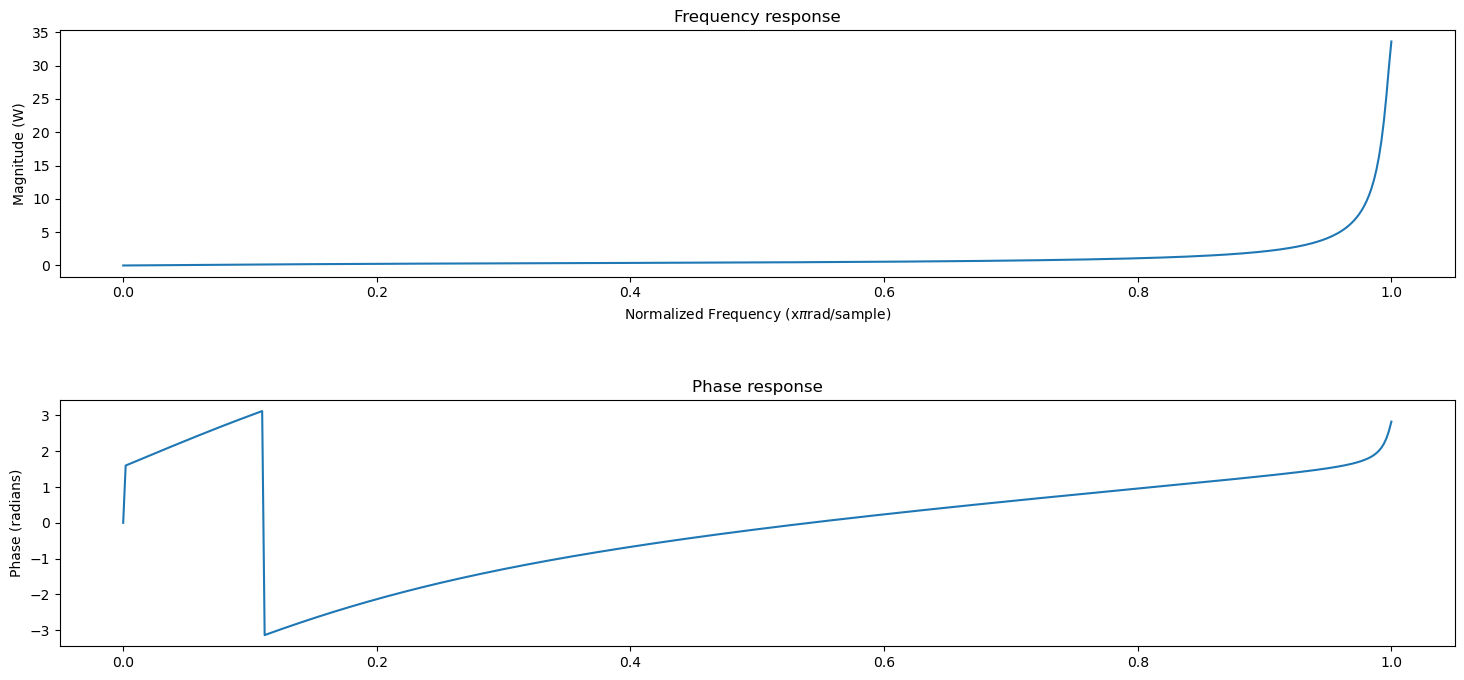

In [11]:
mfreqz(num,den)

#### * respuesta al impulso y al escalon

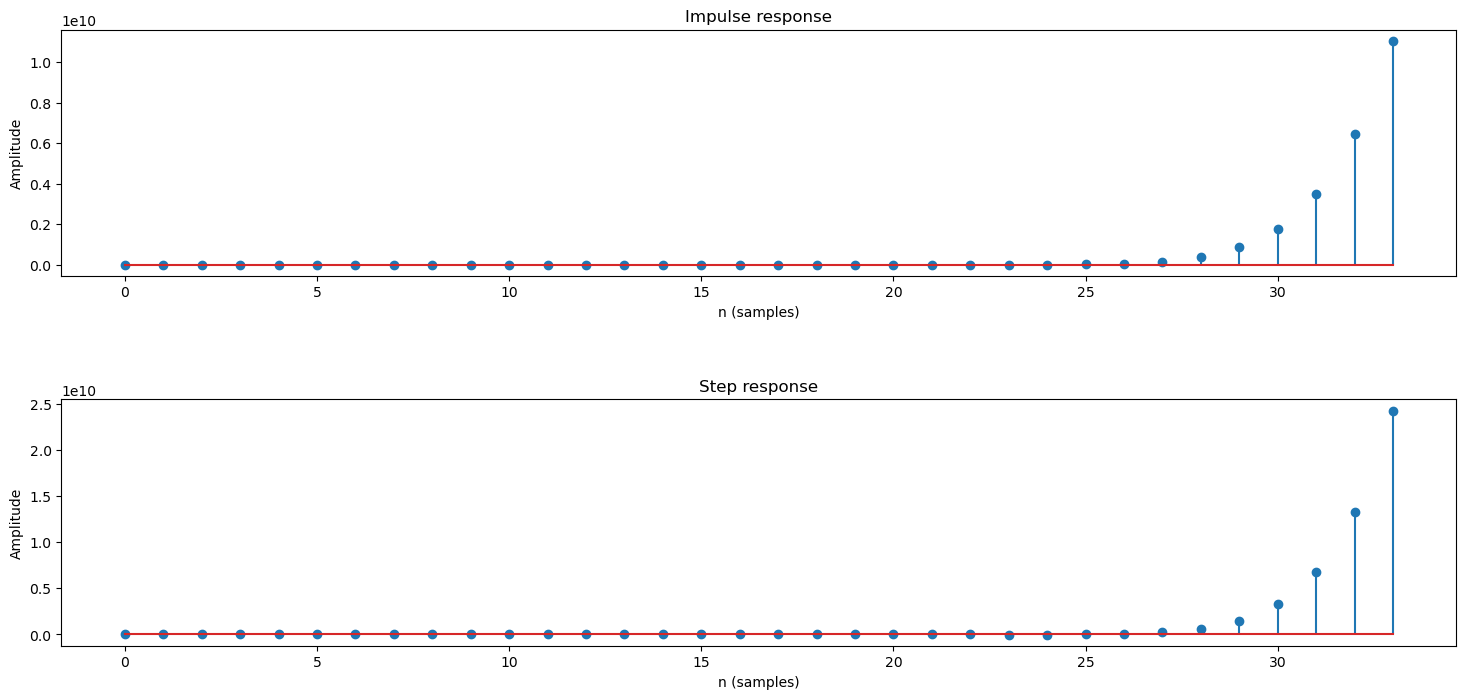

In [12]:
impz(num,den)

#### * Diagrama de polos y ceros

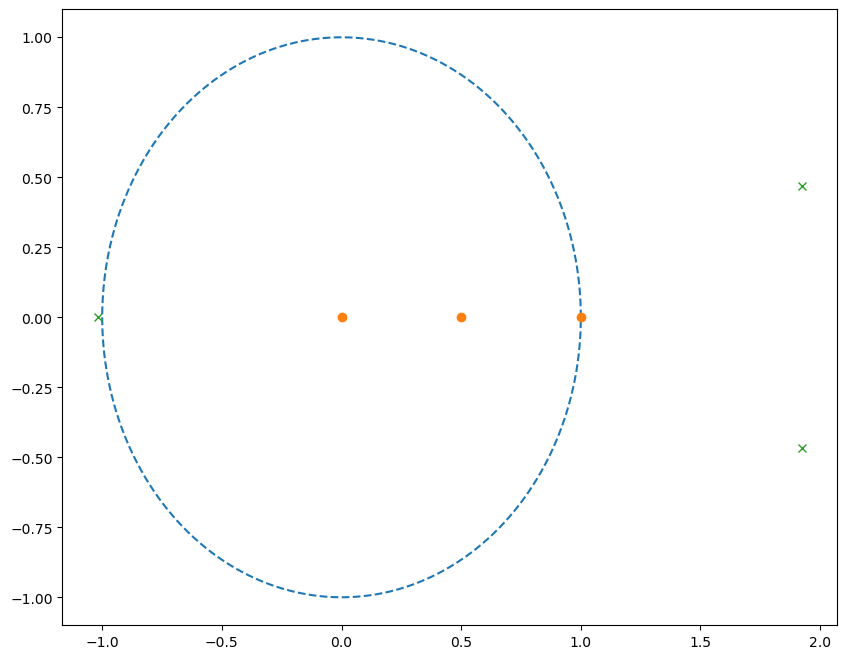

In [19]:
zeropoles(num,den)

#### 2.2) analisis de polos y ceros

#### * los ceros son reales y se encuentran dentro del circulo unitario con valores 0, 1/2 y 1 respectivamente
#### * los polos son uno real con valor -1.02 y dos imaginarios con valores 1.93(+ ó -)0.47j
#### * los polos se encuentran afuera del circulo unitario por lo que nuestro sistema presenta estabilidad 

#### 2.3) analisis de respuesta en frecuencia y fase  

#### * 

#### 2.4) analisis de la respuesta al impulso y escalon

#### * se muestra una secuencia de pulsos con valores mayores a cero tanto en la respuesta al impulso como al escalon, esto muestra que el sistema tiene estabilidad

####  2.5) estabilidad del sistema

#### * generalizando los anteriores analisis se muestra que el sistema es un sistema estable

### 2) Filtros Digitales
#### 2.1) generar señal

In [104]:
fs=5000 #frecuencia de muestreo
t=np.arange(0,40,1/fs) # tiempo 
data=np.sin(2*np.pi*(t**2)) #sinusoidal de frecuencia cuadratica

#### 2.2) grafica y audio

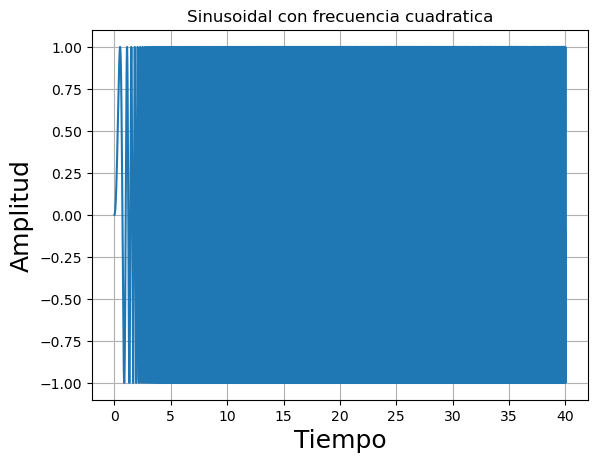

In [105]:
from IPython.display import Audio
plt.plot(t,data)
plt.xlabel('Tiempo',fontsize=18)
plt.ylabel('Amplitud',fontsize=18)
plt.title("Sinusoidal con frecuencia cuadratica")
plt.grid() 
plt.show()

Audio(data,rate=fs)

#### como puede observarse la amplitud de la señal es entre -1 y 1 va aumentando la frecuencia y en cuanto a la reproduccion de esta a pasar el tiempo la señal se vuelve mas aguda, esto da una sensacion de aumento de volumen 

#### 2.3) funcion de transferencia de un filtro FIR

In [106]:
import scipy.signal as signal
n = 9
num = signal.firwin(n, [0.2, 0.4],pass_zero=False)
den=np.zeros(n)
den[0] = 1

#### 2.4) Graficas

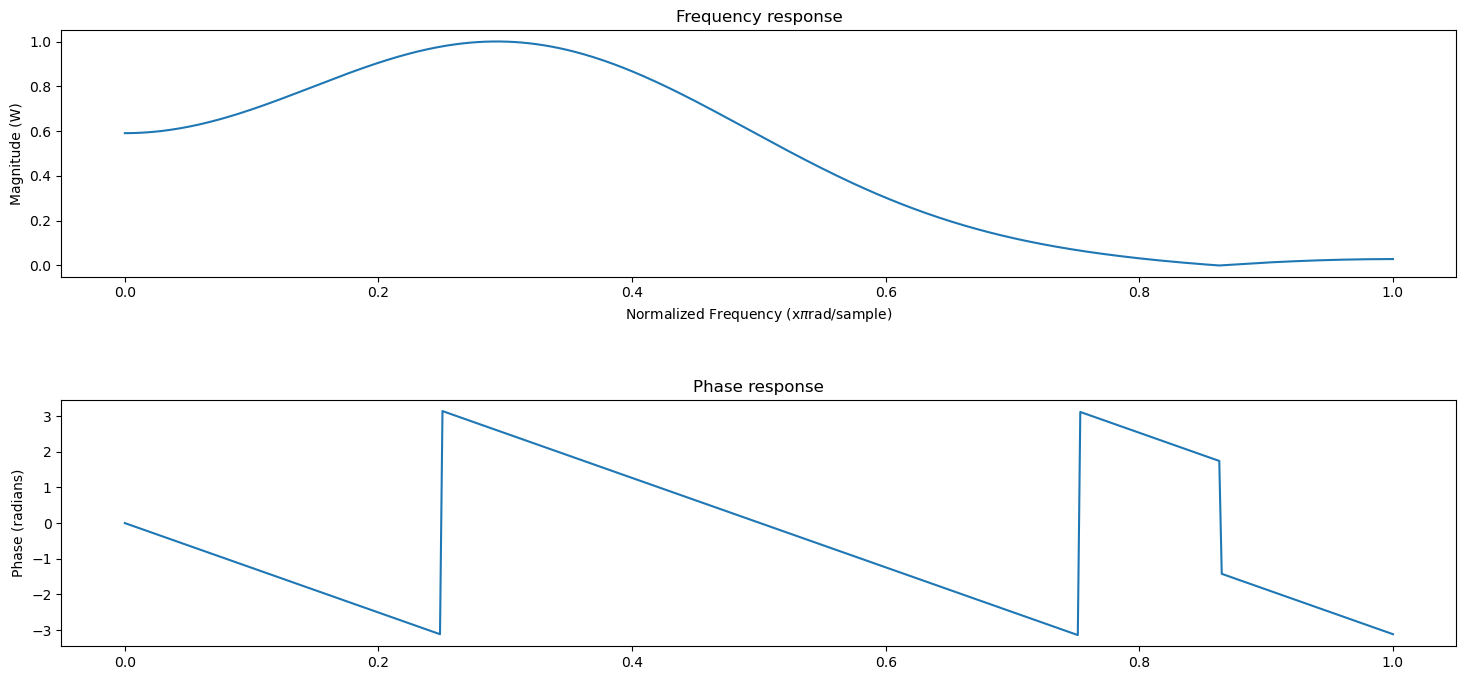

In [107]:
mfreqz(num,den)

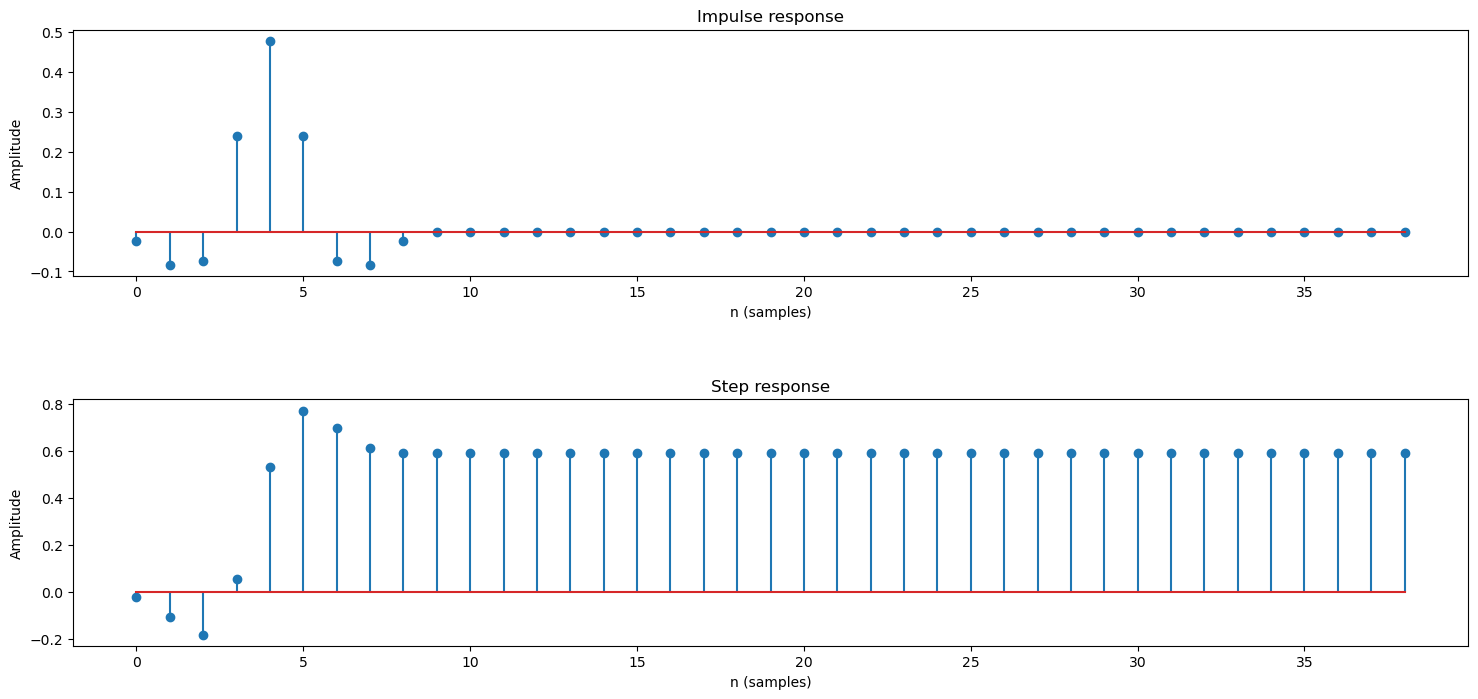

In [108]:
impz(num,den)

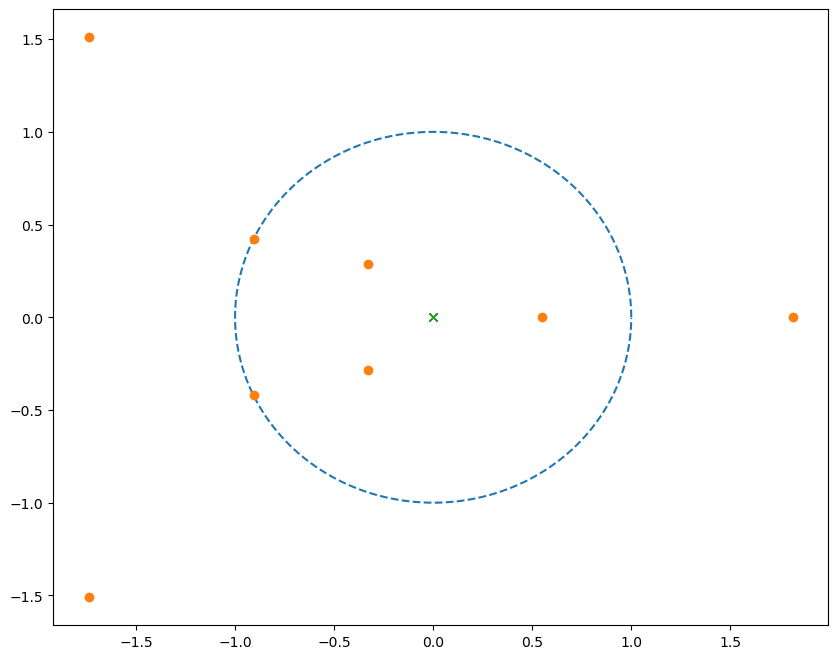

In [109]:
zeropoles(num,den)

#### 2.5)

#### La señal va de 0 a 8, con n= 9 de muestras
#### La respuesta al impulso son 9 muestras que forman una forma de onda  senosoidal normalizada es decir una función "Sa", con simetria en el punto 4 y su maxima amplitud es alrrededor de 0.5
#### La respuesta al escalon tiene un comportamiento senosoidal  con amplitudes no mayores a 1, mostrando estabilizacion en 0.6
#### Con la respuesta al impulso y al escalon se muestra que el sistema es estable
#### Se observa que se tiene 8 ceros y 1 polo respectivamente, el sistema es estable al encontrarse el polo dentro del circulo unitario y se encuentra centrado en (0,0)
#### Los ceros por fuera del circulo unitario generan un cambio poco significativo comparandolos con los polos, estos generan un cambio de fase en la señal del sistema
#### El sistema se comporta como un filtro pasabajas con frecuencia de corte alrrededor de 0.7 pi*rad/muestra
#### La fase presenta un comportamiento lineal antes de la frecuencia de corte (0.7)

#### 2.6) sin filtro y con filtro FIR 

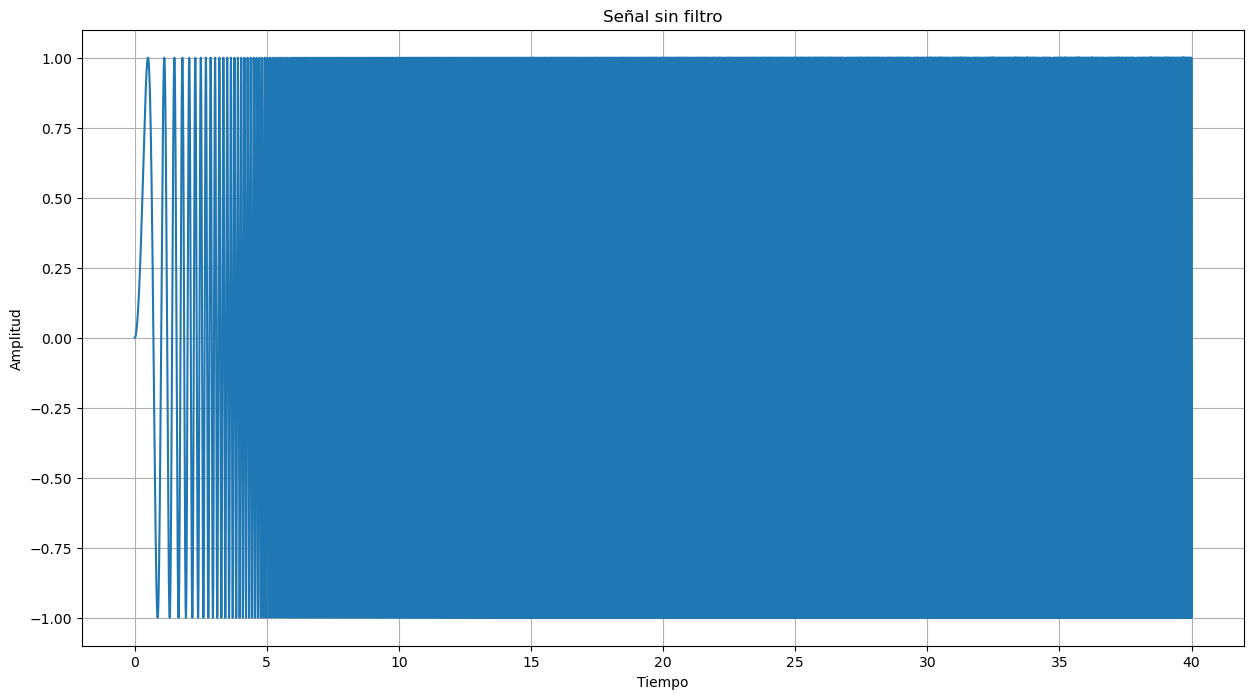

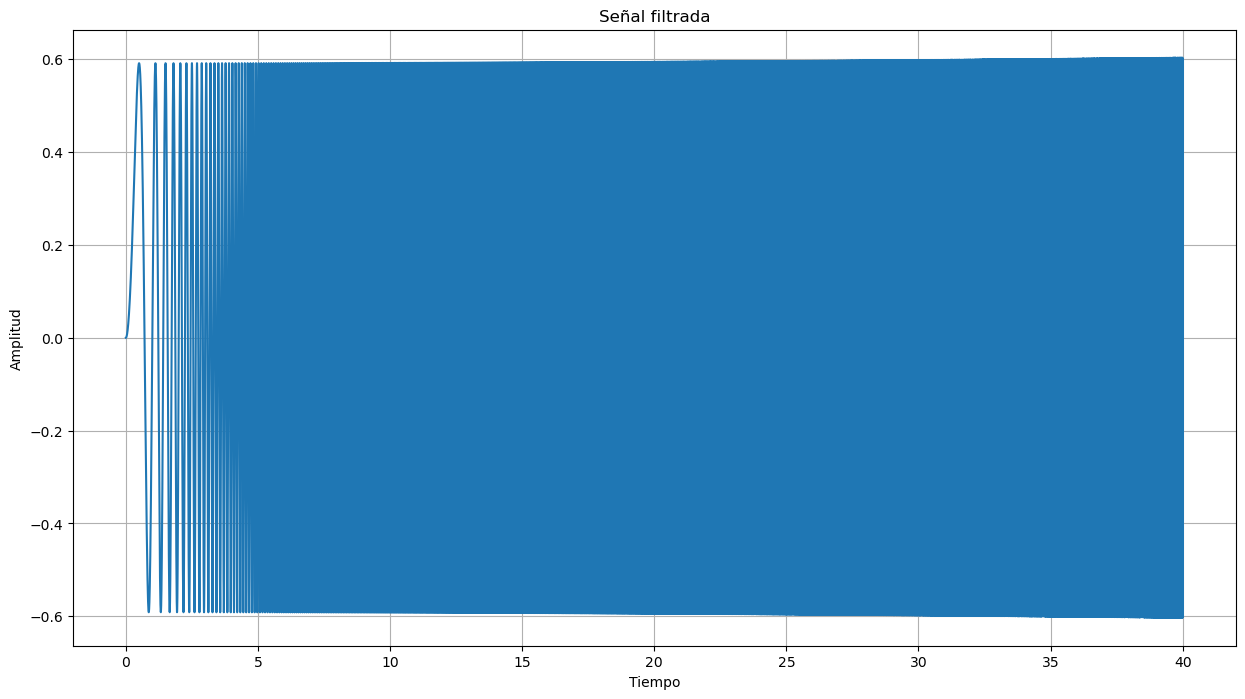

In [110]:
#señal sin filtro
plt.figure(figsize=(15,8)) 
plt.plot(t,data)
plt.title("Señal sin filtro")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

data2=np.convolve(data, num, mode='same') #convolucion señal frecuencia cuadratica y filtro

#señal filtrada
plt.figure(figsize=(15,8))
plt.plot(t,data2)
plt.title("Señal filtrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#### como puede observarse la señal luego del filtro sigue teniendo el mismo comportamiento por lo cual la señal no se considera de alta frecuencia pero si muestra una disminucion y/o atenuacion en amplitud

#### 2.7) aumento del otrden del filtro

#### n= 20

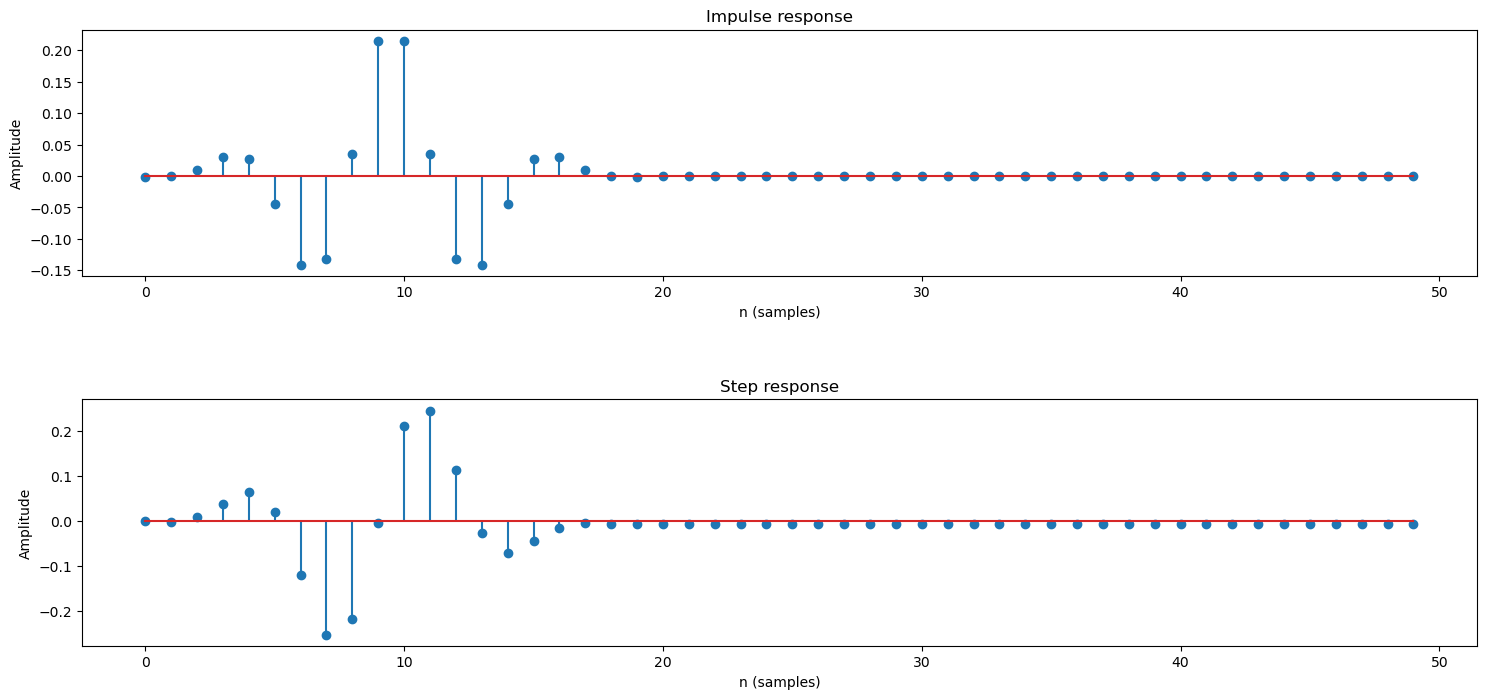

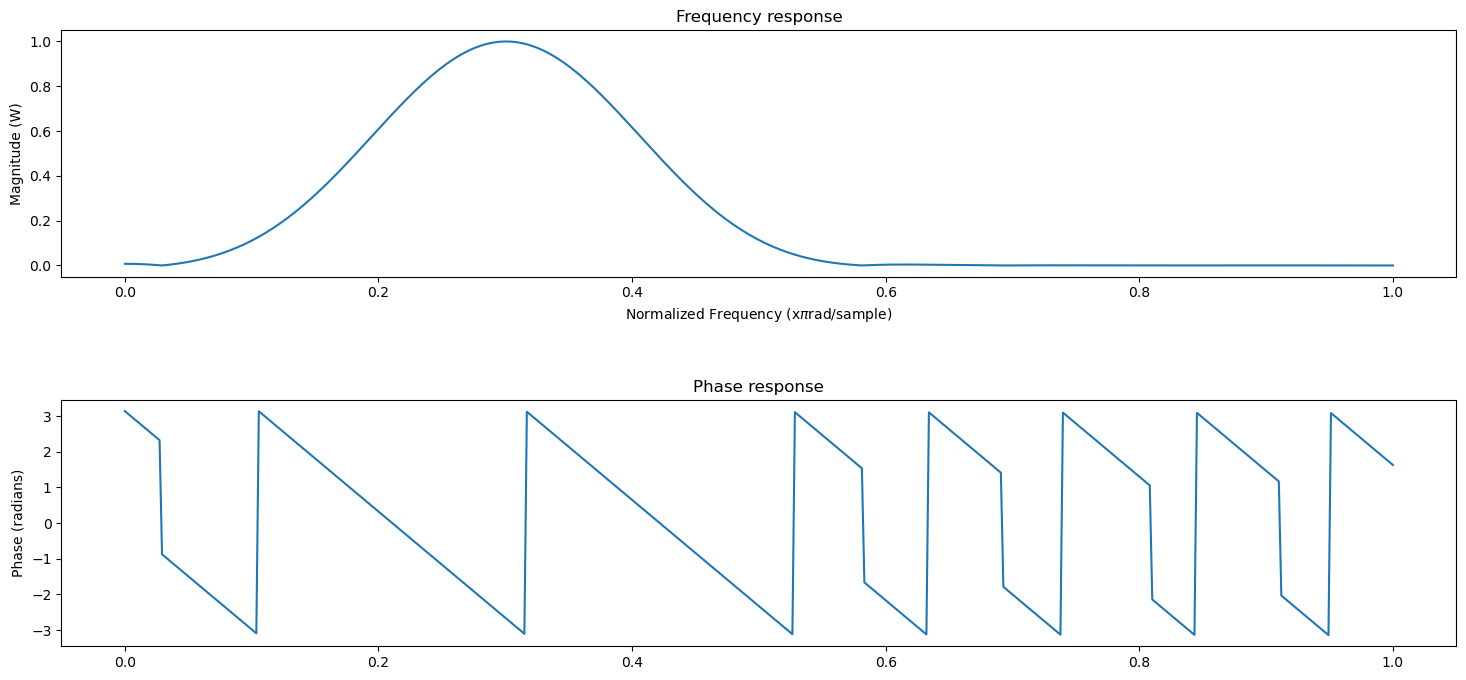

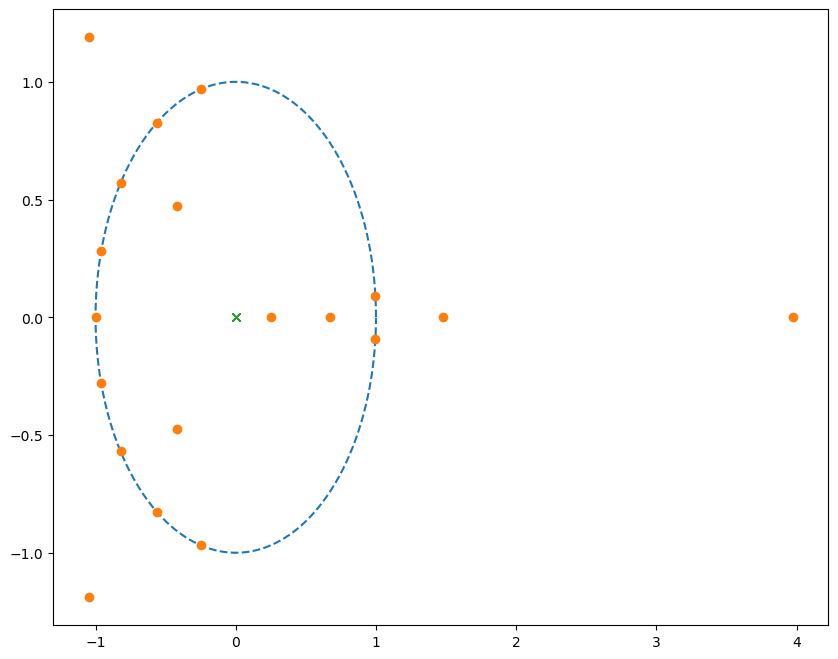

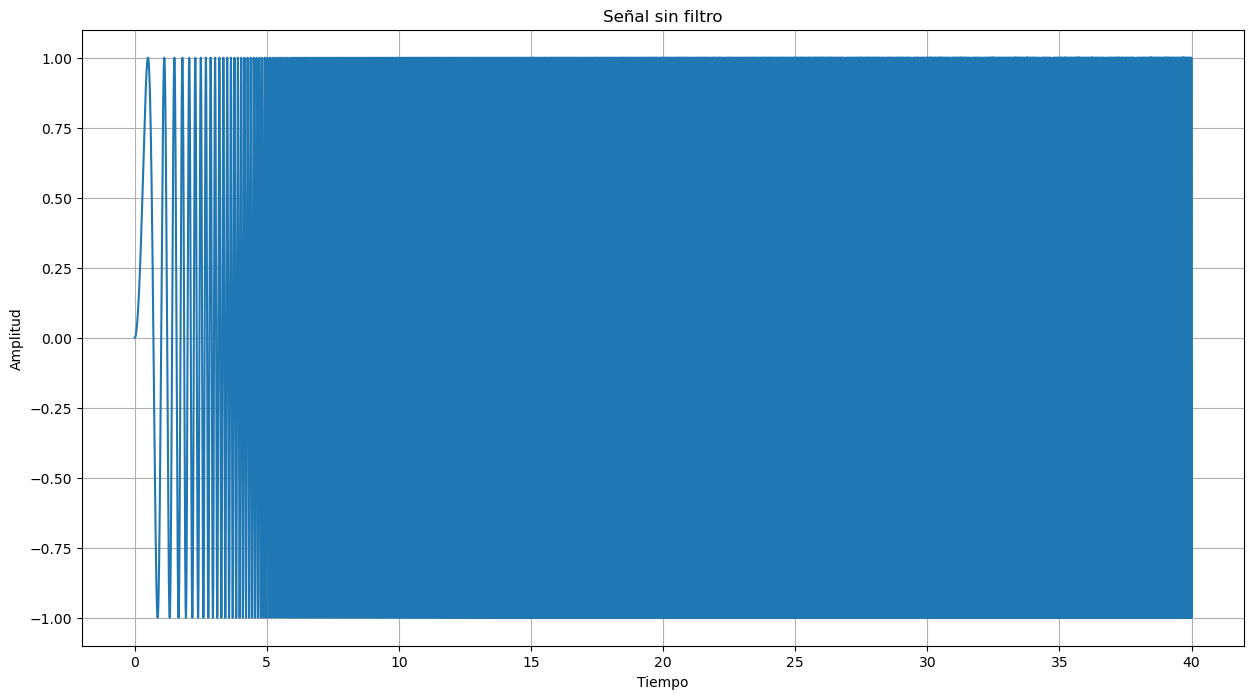

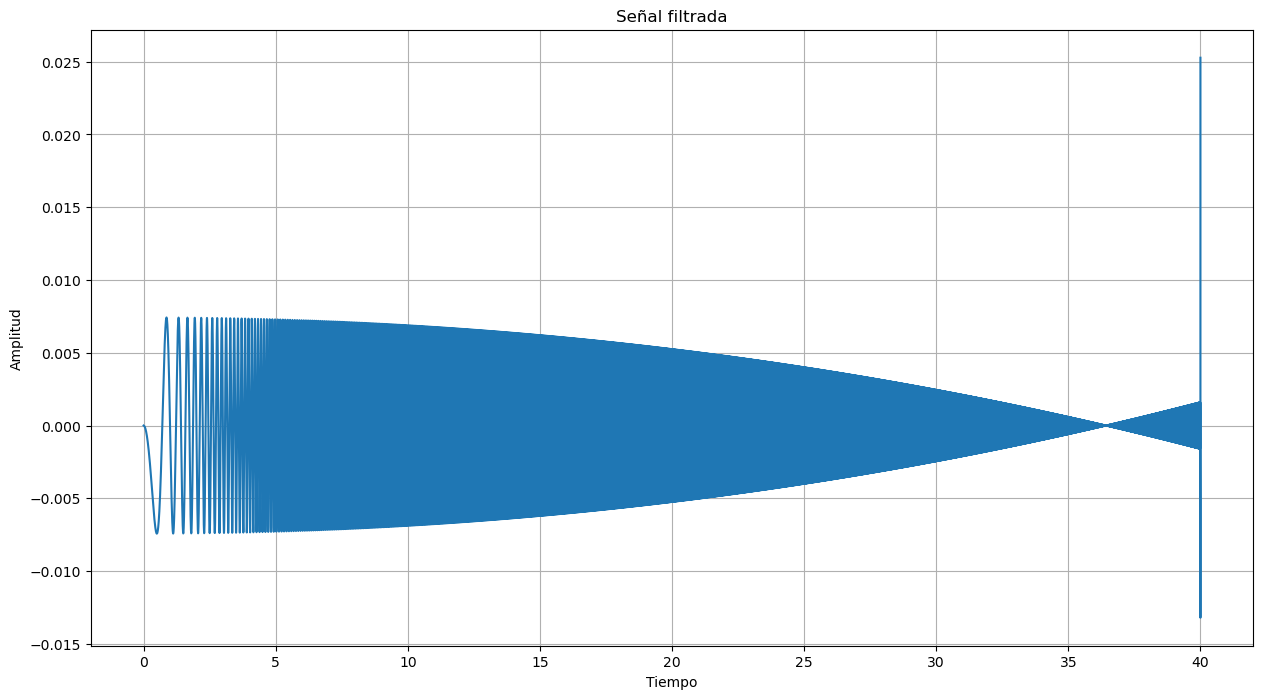

In [111]:
import scipy.signal as signal
n = 20
num = signal.firwin(n, [0.2, 0.4],pass_zero=False)
den=np.zeros(n)
den[0] = 1

impz(num,den)
mfreqz(num,den)
zeropoles(num,den)

data3=np.convolve(data, num, mode='same') #convolucion señal frecuencia cuadratica y filtro

#señal sin filtro
plt.figure(figsize=(15,8)) 
plt.plot(t,data)
plt.title("Señal sin filtro")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#señal filtrada
plt.figure(figsize=(15,8))
plt.plot(t,data3)
plt.title("Señal filtrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#### señal de 0 a 19, con n=20 siendo n la cantidad de muestras
#### La respuesta al impulso es una onda  senosoidal normalizada es decir una función "Sa", con simetria en el punto 9.5 y su maxima amplitud es alrrededor de 0.20
#### La respuesta al escalon tiene un comportamiento senosoidal con amplitudes no mayores a 0.5, posteriormente muestra  estabilizacion en 0
#### se observa que se tiene 19 ceros y un polo centrado en el origen respectivamente, el sistema es estable
#### el sistema se comporta como un filtro pasabajas
#### frecuencia de corte alrrededor de 0.5pi*rad/muestras

#### La fase presenta un comportamiento lineal antes de la frecuencia de corte (0.5), la figura muestra que tiene dicho comportamiento por que el proceso se repite cada vez que cumple un ciclo de 0 a 2*pi


#### n=30

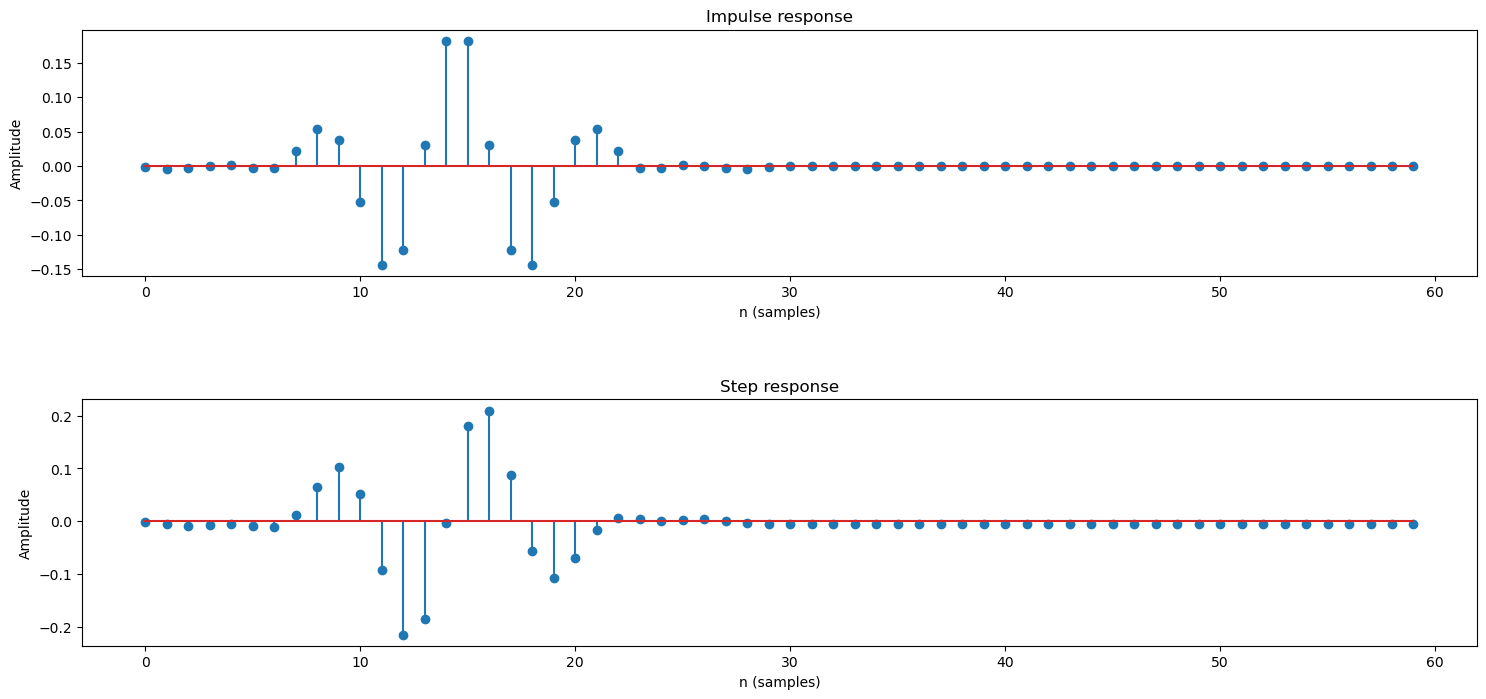

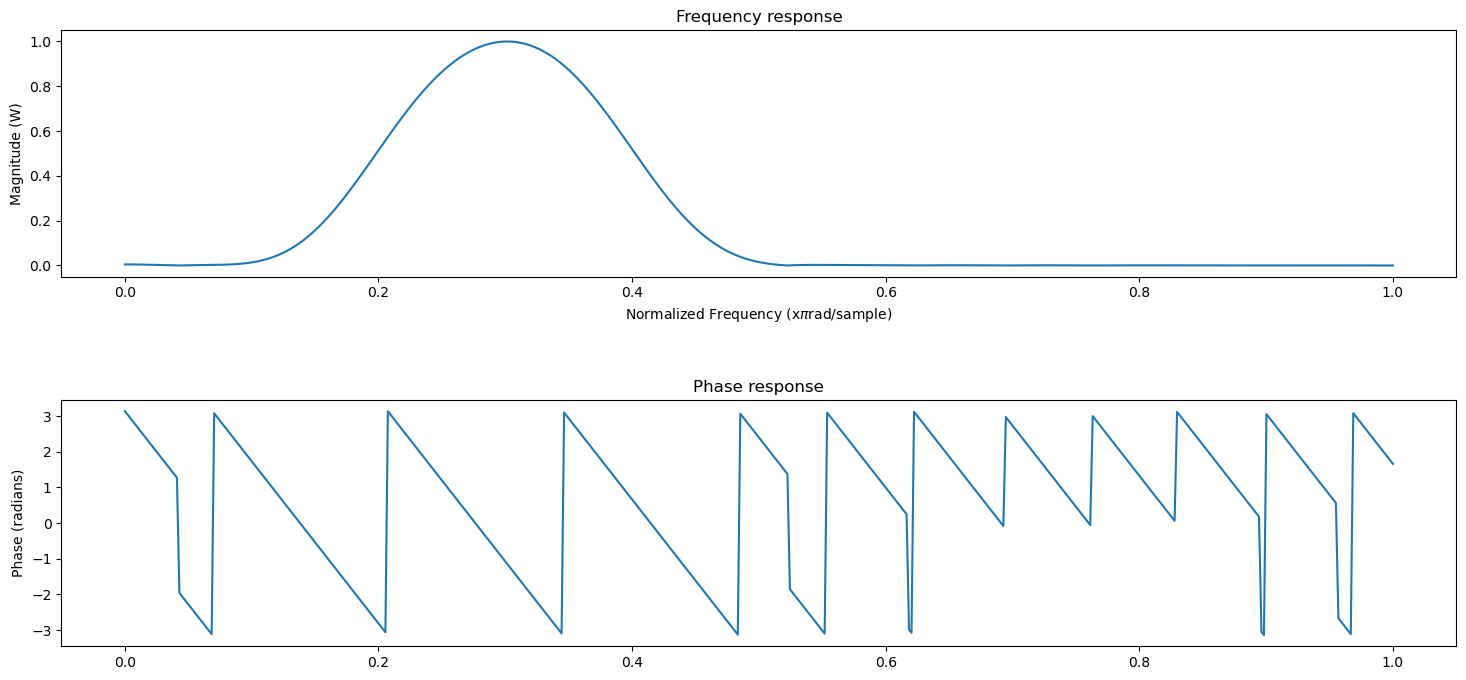

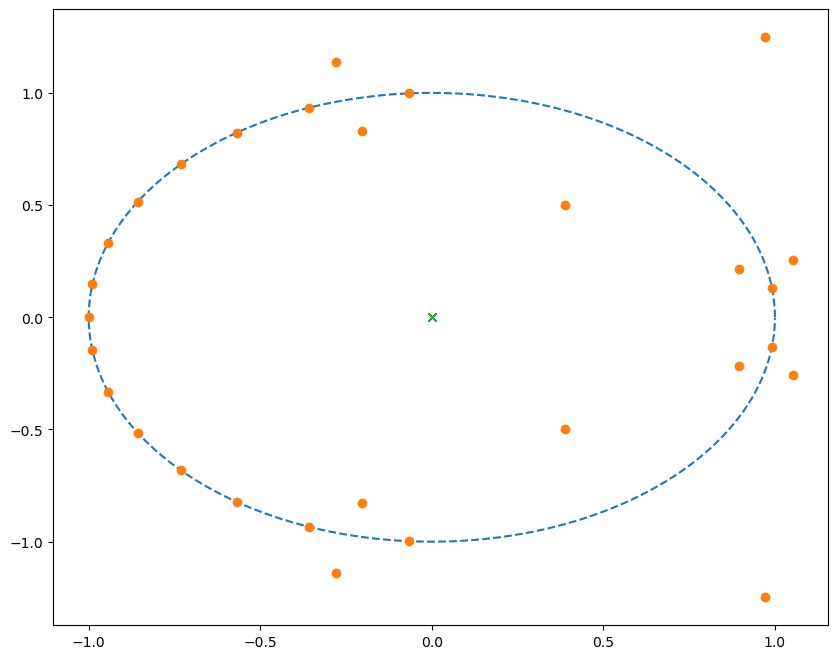

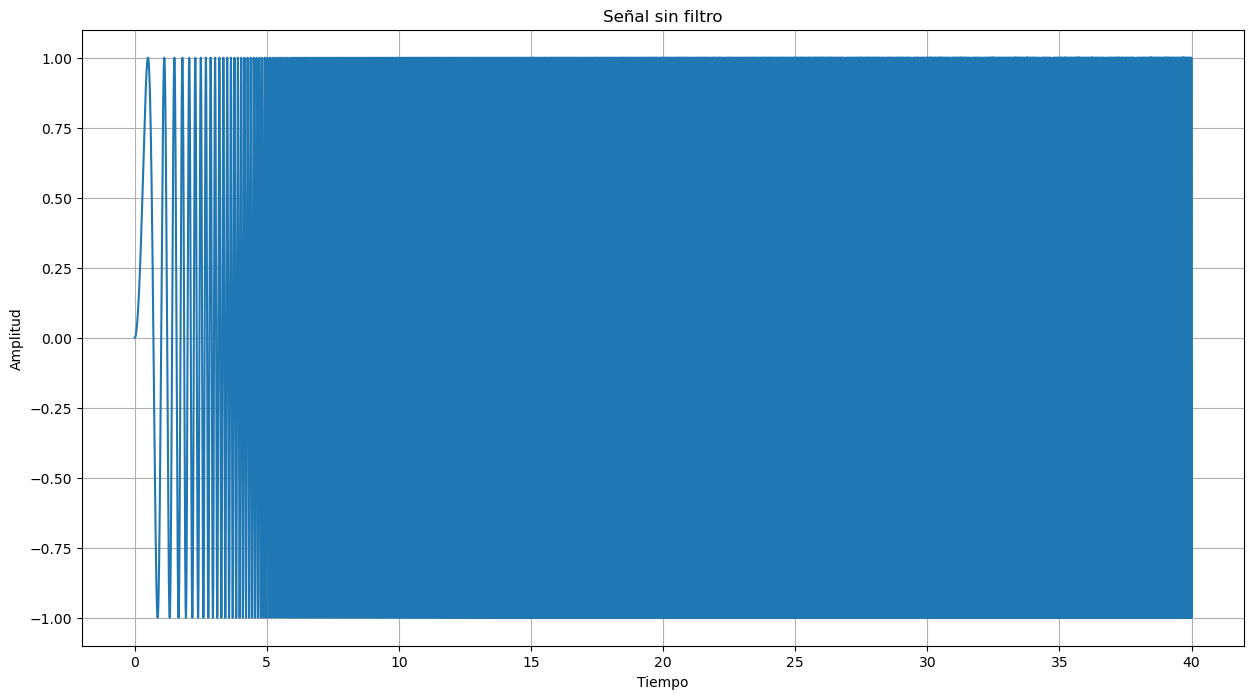

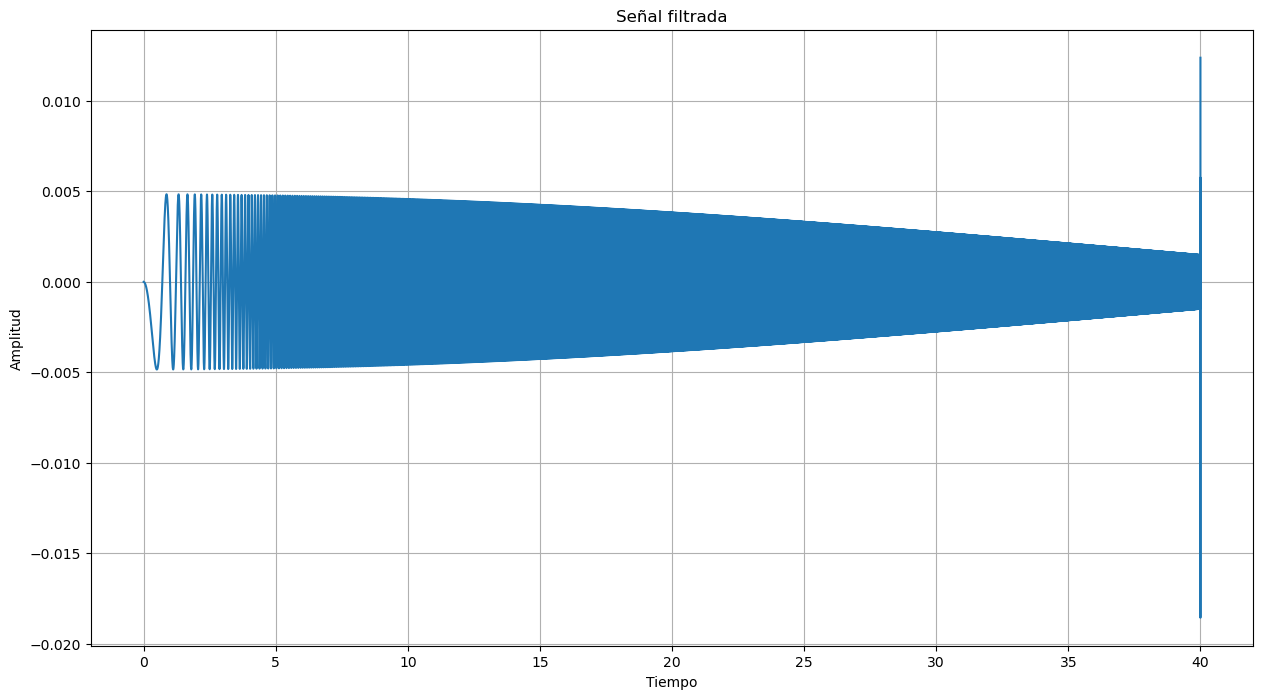

In [112]:
import scipy.signal as signal
n = 30
num = signal.firwin(n, [0.2, 0.4],pass_zero=False)
den=np.zeros(n)
den[0] = 1

impz(num,den)
mfreqz(num,den)
zeropoles(num,den)

data3=np.convolve(data, num, mode='same') #convolucion señal frecuencia cuadratica y filtro

#señal sin filtro
plt.figure(figsize=(15,8)) 
plt.plot(t,data)
plt.title("Señal sin filtro")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#señal filtrada
plt.figure(figsize=(15,8))
plt.plot(t,data3)
plt.title("Señal filtrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()



#### señal de 0 a 29, con n=30 siendo n la cantidad de muestras
#### La respuesta al impulso es una onda  senosoidal normalizada "Sa"
#### simetria alrrededor de 14.5 con amplitud no mayor a 0.17
#### se observa que se tiene 29 ceros y un polo respectivamente, el sistema es estable
#### el sistema se comporta como un filtro pasabandas
#### frecuencia de corte alrrededor de 0.5pi*rad/muestras

#### n=40

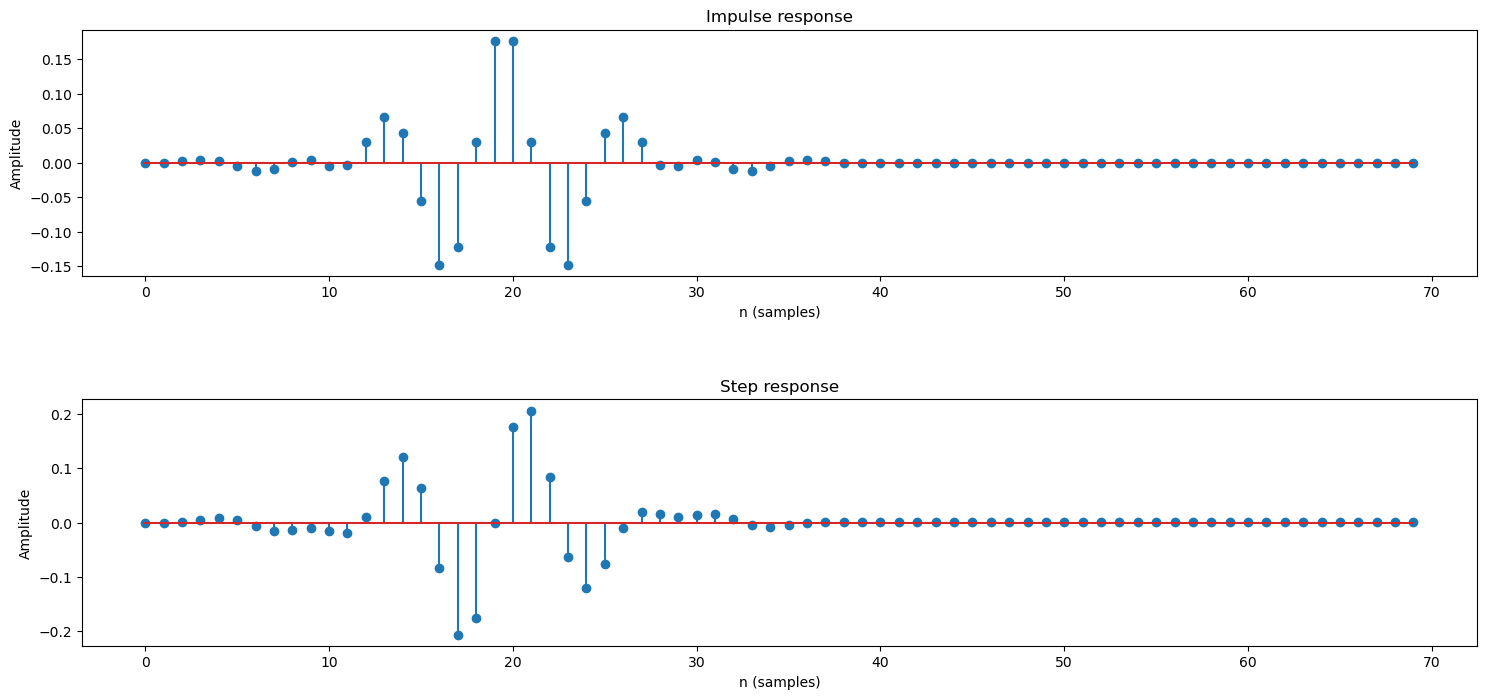

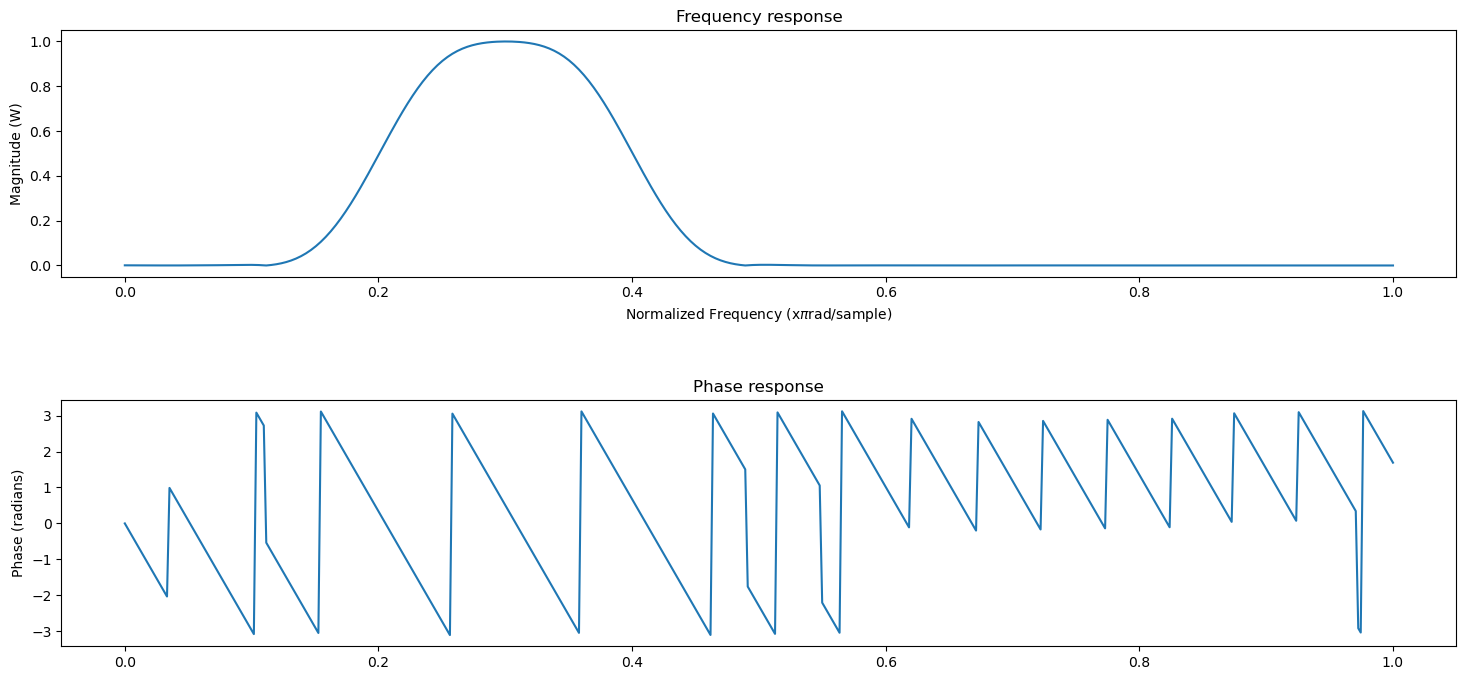

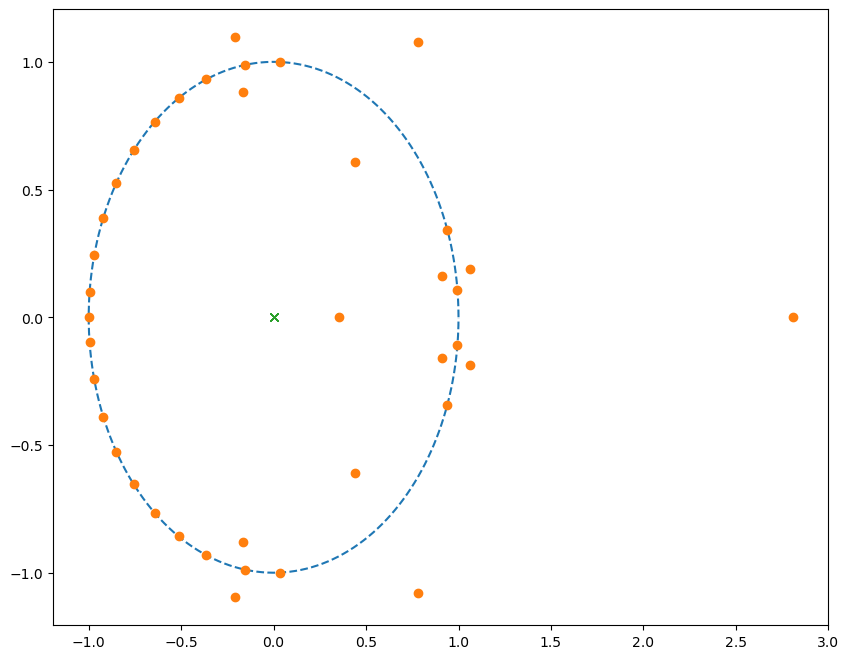

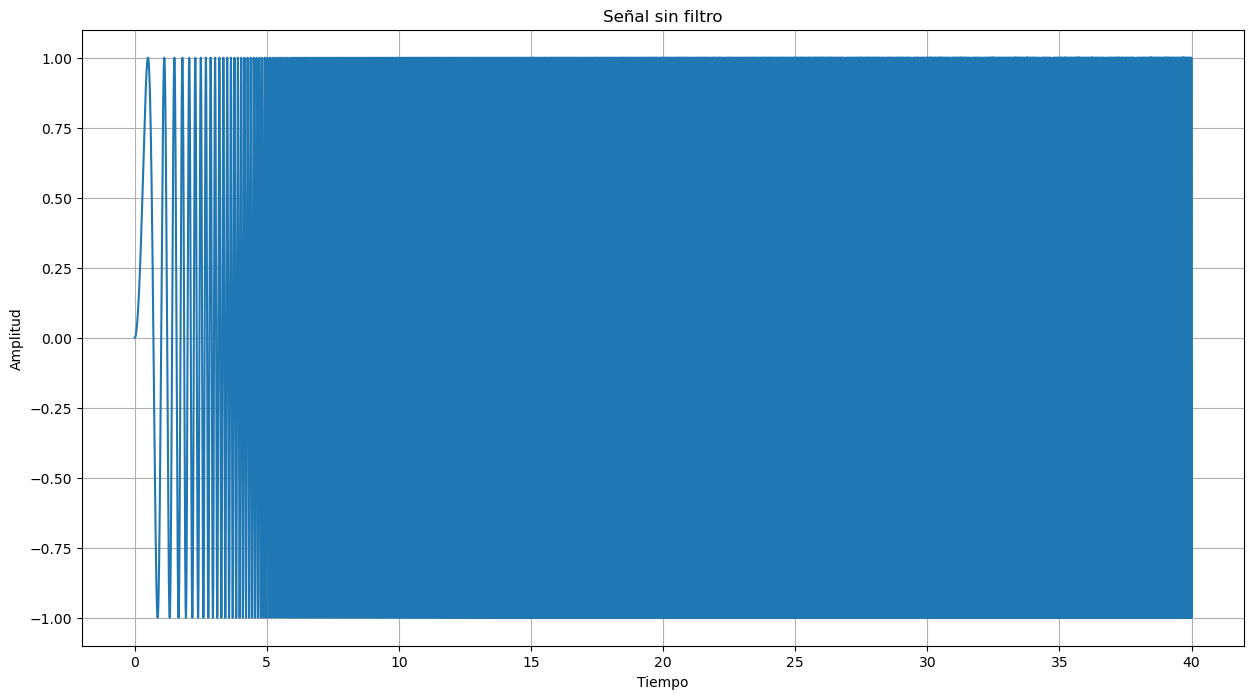

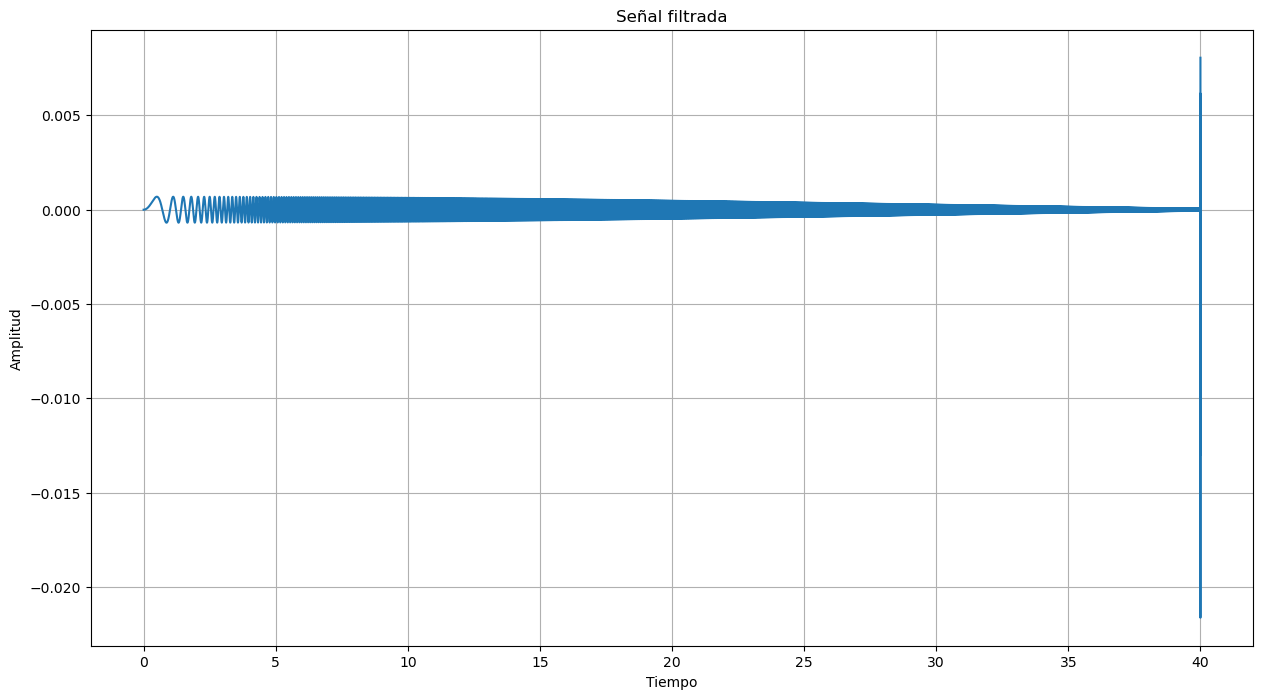

In [113]:
import scipy.signal as signal
n = 40
num = signal.firwin(n, [0.2, 0.4],pass_zero=False)
den=np.zeros(n)
den[0] = 1

impz(num,den)
mfreqz(num,den)
zeropoles(num,den)

data3=np.convolve(data, num, mode='same') #convolucion señal frecuencia cuadratica y filtro

#señal sin filtro
plt.figure(figsize=(15,8)) 
plt.plot(t,data)
plt.title("Señal sin filtro")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#señal filtrada
plt.figure(figsize=(15,8))
plt.plot(t,data3)
plt.title("Señal filtrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#### señal de 0 a 39, con n=40 siendo n la cantidad de muestras
#### La respuesta al impulso  y escalon es una onda  senosoidal normalizada "Sa"
#### simetria alrrededor de 20 con amplitud no mayor a 0.17
#### se observa que se tiene 39 ceros y un polo respectivamente dentro del circulo unitario, el sistema es estable
#### el sistema se comporta como un filtro pasabandas

#### 2.8) señal con frecuencia cubica

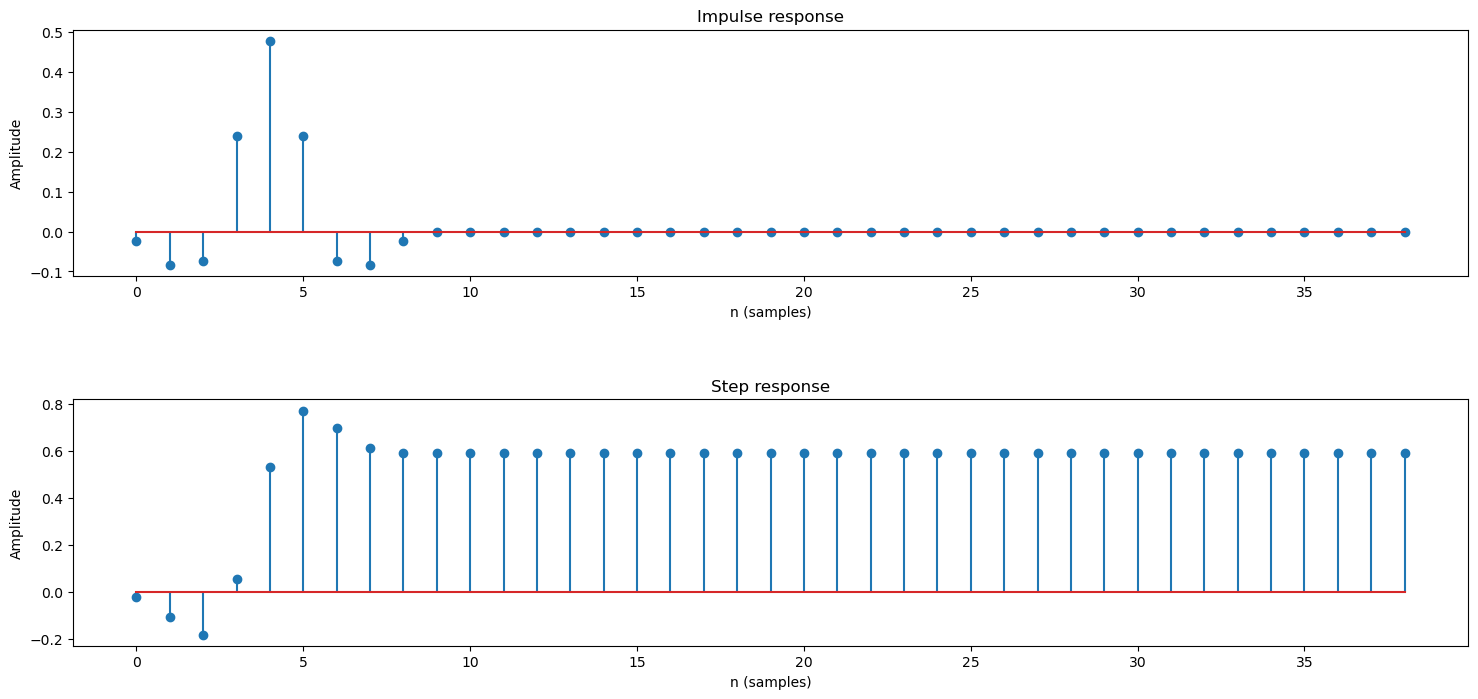

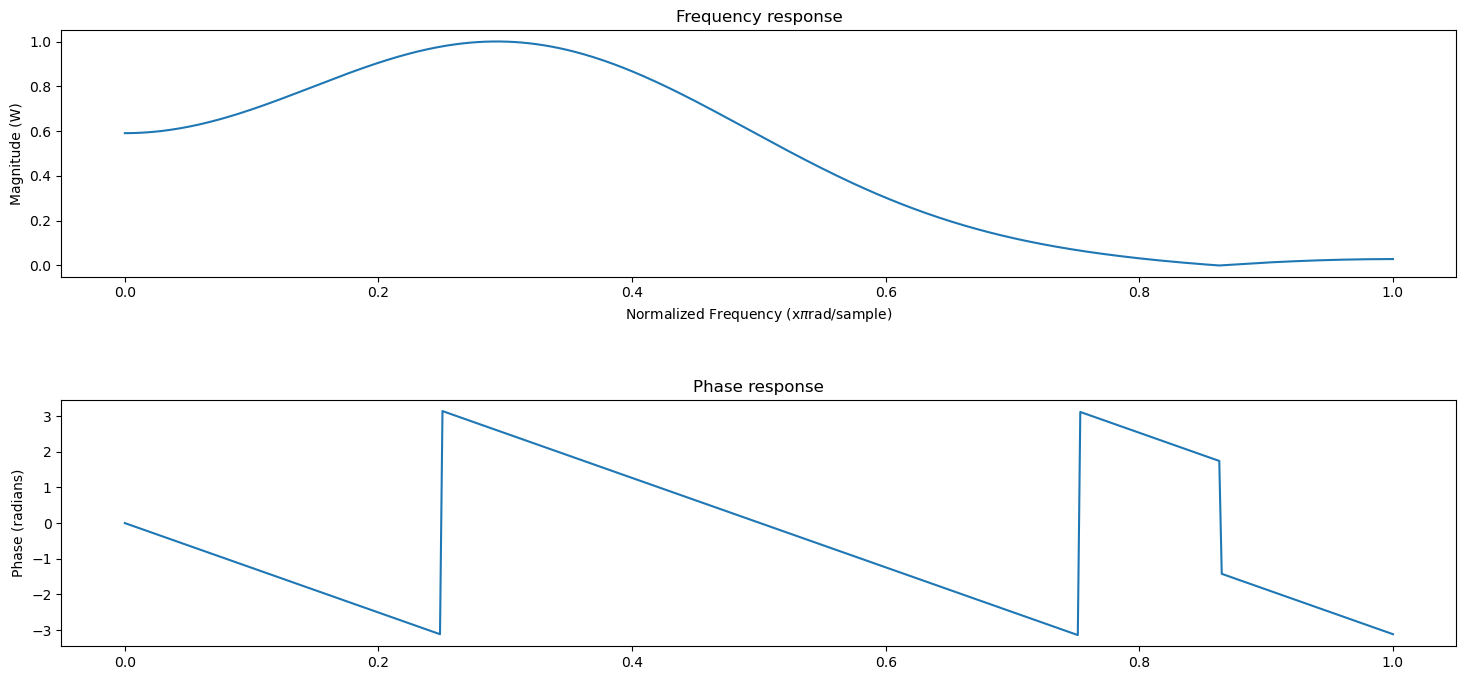

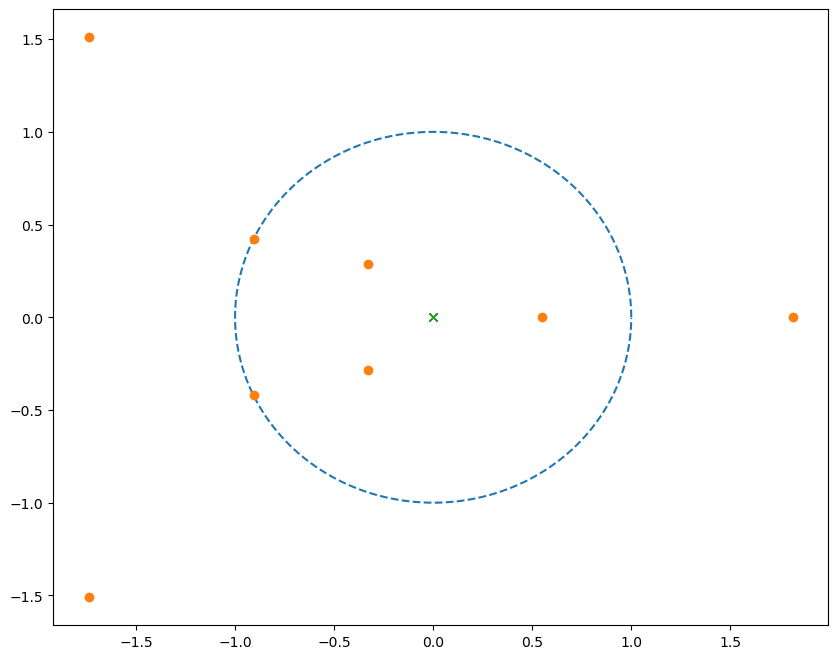

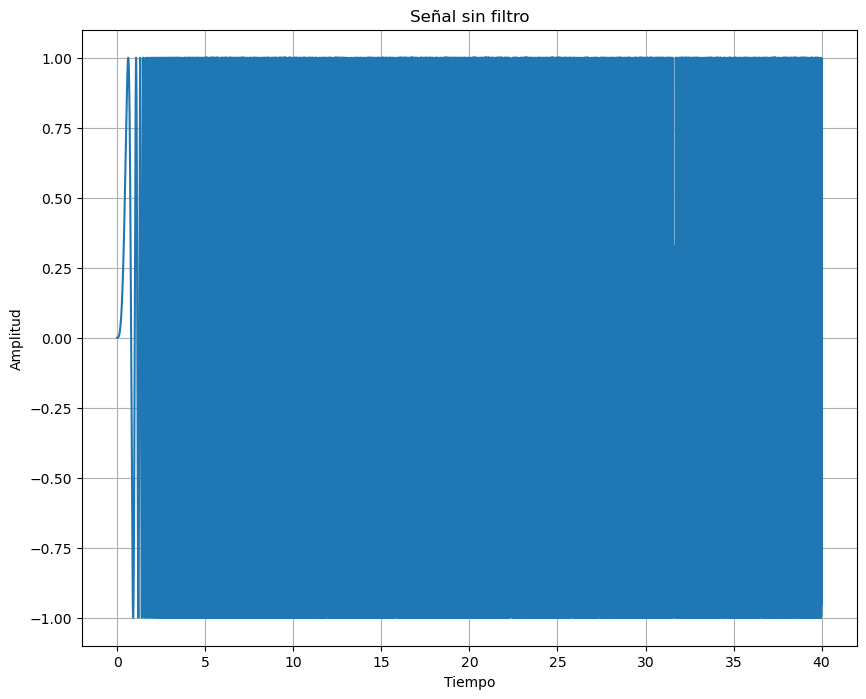

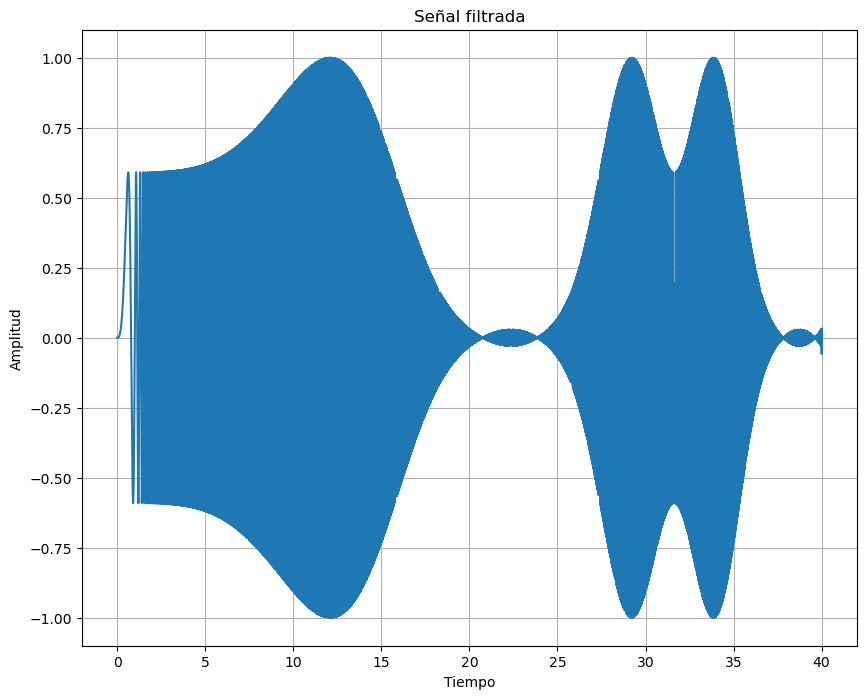

In [122]:
fs=3000 #frecuencia de muestreo
t=np.arange(0,40,1/fs) # tiempo 
senal2=np.sin(2*np.pi*(t**3)) #señal con frecuencia cubica

Audio(senal2,rate=fs)

n = 9
num = signal.firwin(n, [0.2, 0.4],pass_zero=False)
den=np.zeros(n)
den[0] = 1

impz(num,den)
mfreqz(num,den)
zeropoles(num,den)

data4=np.convolve(senal2, num, mode='same') #convolucion señal frecuencia cuadratica y filtro

#señal sin filtro
plt.figure(figsize=(10,8)) 
plt.plot(t,senal2)
plt.title("Señal sin filtro")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#señal filtrada
plt.figure(figsize=(10,8))
plt.plot(t,data4)
plt.title("Señal filtrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid() 
plt.show()

#### señal de 0 a 8, con n=9 siendo n la cantidad de muestras
#### La respuesta al impulso es una onda  senosoidal normalizada es decir una función "Sa", con simetria en el punto 4 y su maxima amplitud es alrrededor de 0.5
#### La respuesta al escalon tiene un comportamiento senosoidal con amplitudes no mayor a 1
#### se observa que se tiene 8 ceros y un polo respectivamente, el sistema es estable
#### se corrobora que que al aumentar el orden del filtro la señal pasa por cambios mas bruscos e instantaneos


#### analisis final
#### *luego de manipular el numero de muestras  y la dependencia temporal casi al triple se evidencia que la frecuencia sufrira cambios abruptos

### 3) agregando polos y ceros

#### 3.1) retormar valores


In [126]:

import scipy.signal as signal
n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1
data=np.sin(2*np.pi*t*t**2)
#computeZ(num, den, [0.5],[complex(-np.sqrt(2)/4,np.sqrt(2)/4),complex(-np.sqrt(2)/4,-np.sqrt(2)/4)], data)

#### 3.3) explique si se agrega
#### 3.3.a) dos ceros conjugados con magnitud de 1.3

<Figure size 640x480 with 0 Axes>

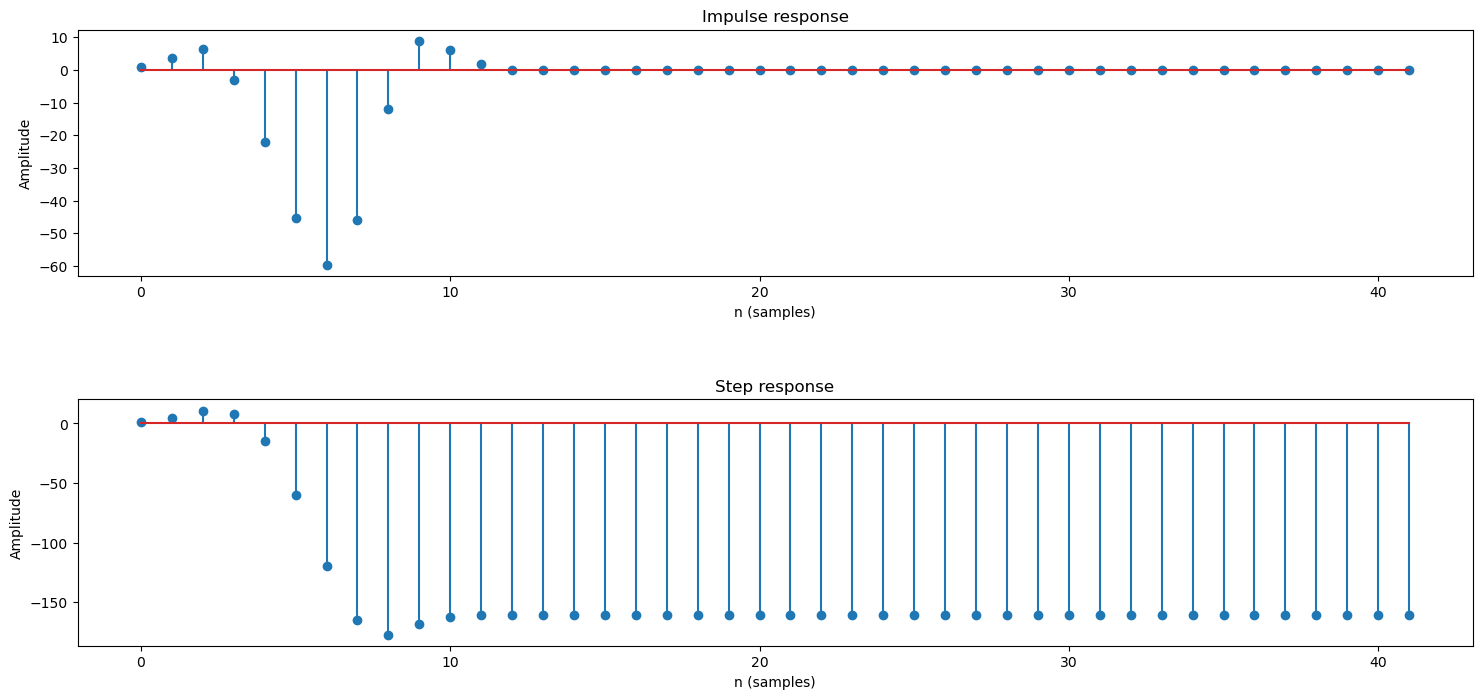

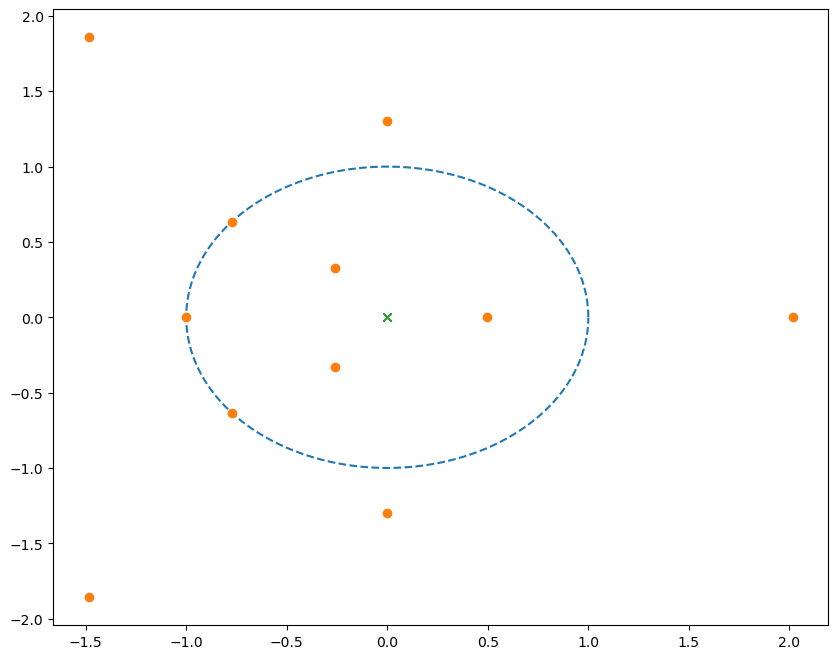

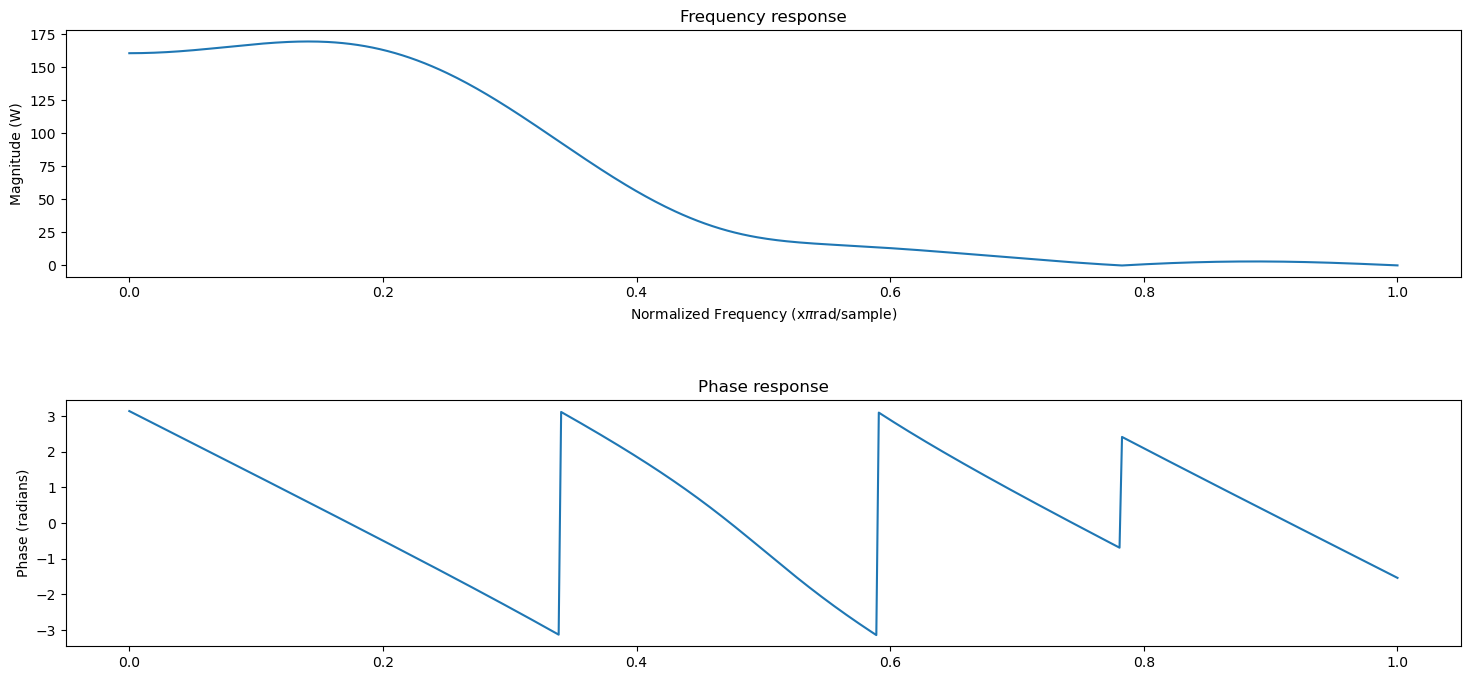

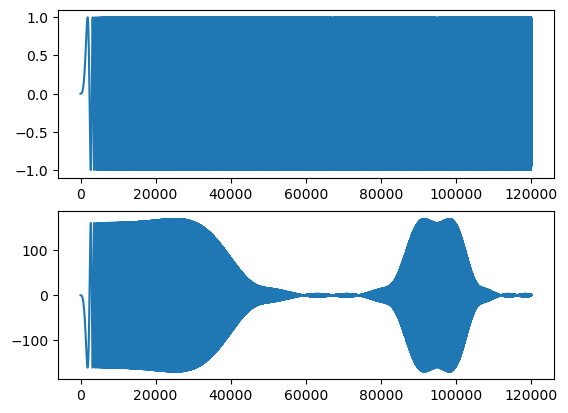

In [127]:
computeZ(num, den, [complex(0, 1.3), complex(0, -1.3)], [], data)

#### se evidencia que al agregar mas ceros al sistema se genera un cambio de fase en el sistema tanto para la respuesta al impulso como  al escalon

#### 3.3.b) polo de magnitud 1.4

<Figure size 640x480 with 0 Axes>

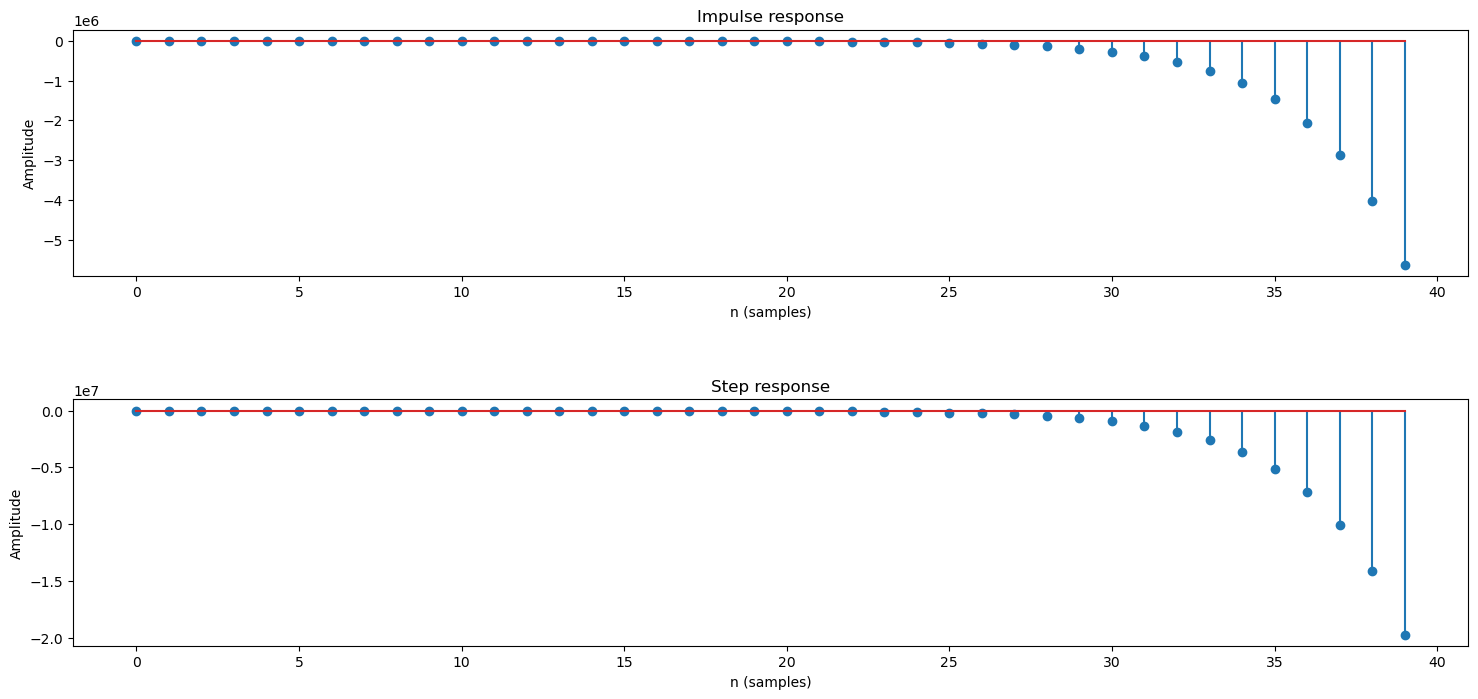

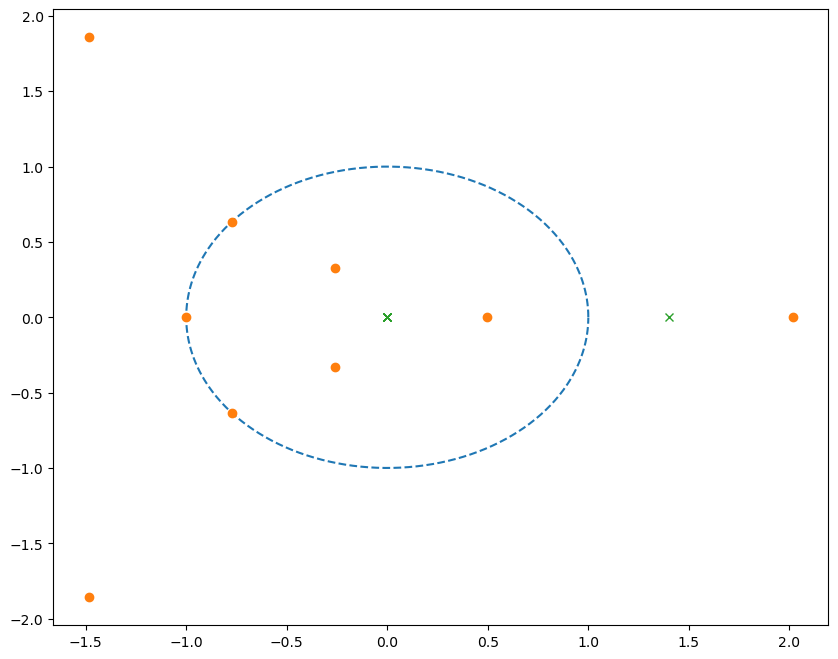

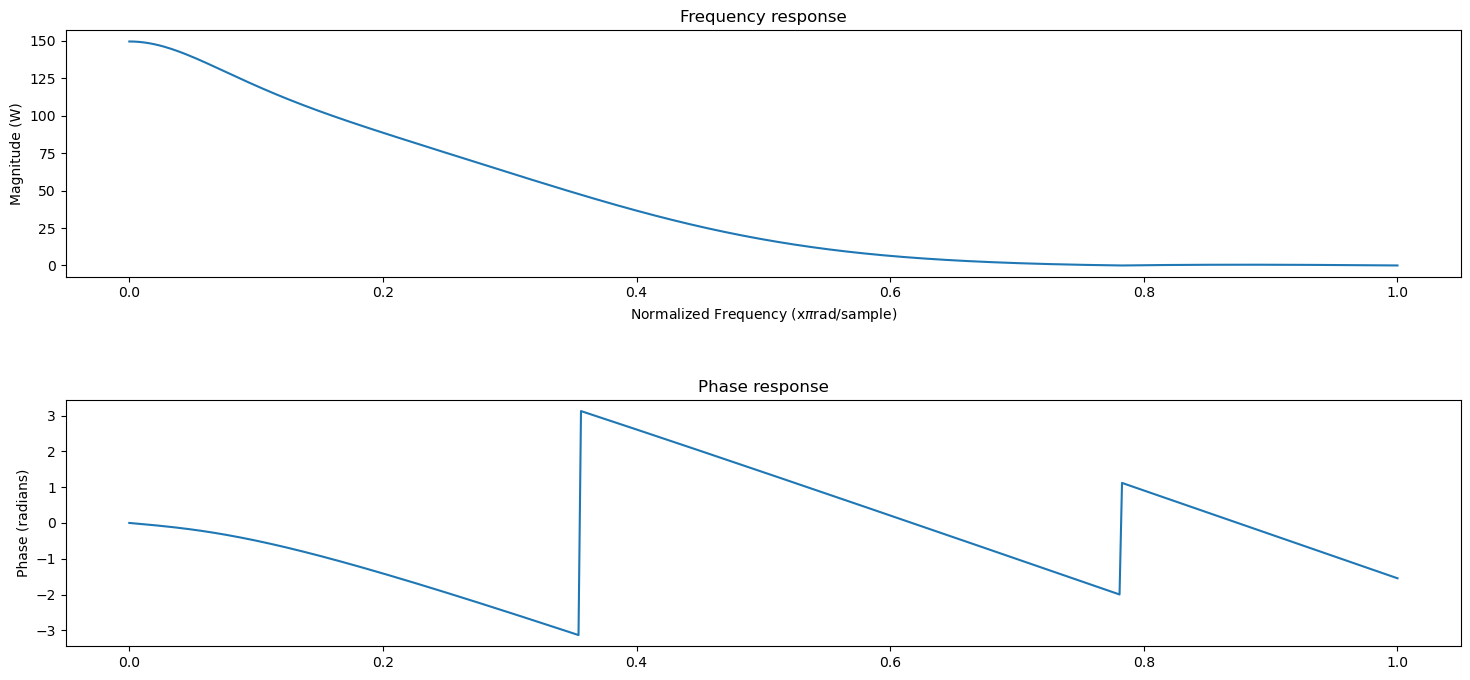

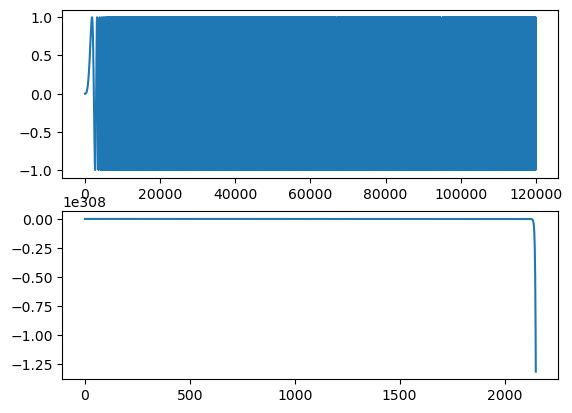

In [128]:
computeZ(num, den, [], [1.4], data)

#### al contener un polo mas la respuesta del sistema tanto al impulso como el escalon cambia, posee un comportamiento exponencial negativo
#### al agregar un polo por fuera de la circunferencia unitario del sistema, este presenta inestabilidad
#### se presenta un aumento de db luego del filtrado, la frecuencia de corte se mantiene

 ### CONCLUCIONES
#### * En este laboratorio se afianzo el uso de funciones como la transformada z para funciones discretas
#### * Manipulacion de la entrada y salida de un sistema por medio de la implementacion de la transformada z
#### * con la transformaza z se puede conocer la respuesta natural y respuesta a un escalon del sistema
#### * El diagrama de polos y ceros informa sobre la estabilidad del sistema
#### * muestra que al manipular la frecuencia de la señal aunque se cumpla el teorema de nyquist podemos tener poblemas a la hora de filtrar
#### * Se evidencia que al manipular el orden de un filtro esta modifica su funcion de transferencia por el cual el filtro cambia de pasabandas y pasabajas y/o pasaaltas
#### * se puede inferir y/o analizar diferentes componentes de un sistema ya sea con comportamientos temporales o comportamientos en el dominio de la frecuencia
#### * Se muestra que la adicion de ceros no modifica el comportamiento o estabilidad del sistema, lo que genera es un cambio de fase
#### * Al agregar polos en el sistema este si influencia sobre el comportamiento del sistema y dependera de este si converbara su estabilidad o no